<a href="https://colab.research.google.com/github/HIMANSHI549/BRESTcancer/blob/main/BreastCancerClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        48
         1.0       0.94      1.00      0.97        66

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.945 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.912 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.956 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.934 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.945 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.901 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=r

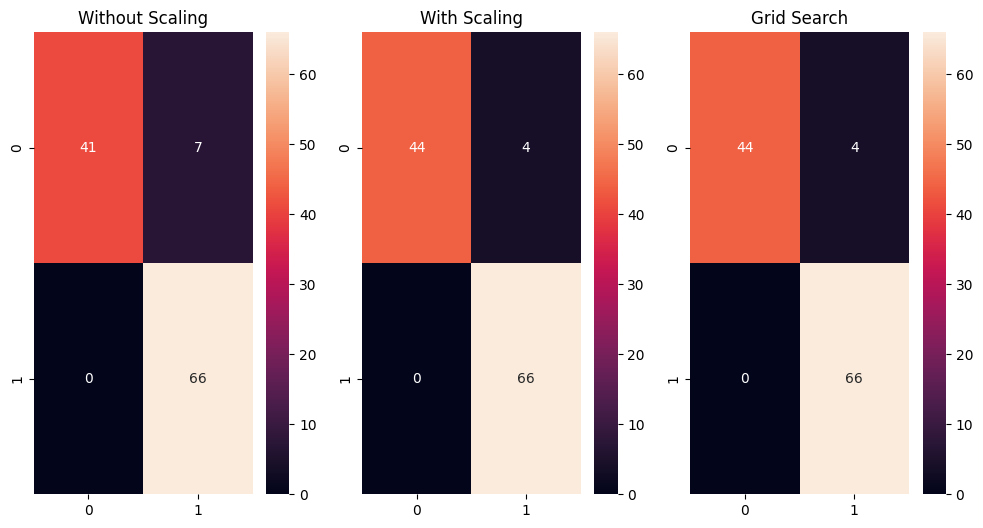

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()
df_cancer=pd.DataFrame(np.c_[cancer['data'],cancer['target']],columns=np.append(cancer['feature_names'],['target']))
#sns.pairplot(df_cancer,hue='target',vars=['mean radius','mean texture','mean perimeter','mean area','mean smoothness'])
#sns.countplot(df_cancer['target'])
#sns.scatterplot(x='mean area',y='mean smoothness',hue='target',data=df_cancer)
#plt.figure(figsize=(20,10))
#sns.heatmap(df_cancer.corr(),annot=True)

x=df_cancer.drop(['target'],axis=1)
y=df_cancer['target']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
svc_model=SVC()
svc_model.fit(x_train,y_train)
y_predict=svc_model.predict(x_test)
cm=confusion_matrix(y_test,y_predict)
fig,axes = plt.subplots(1, 3, figsize=(12, 6))
sns.heatmap(cm,annot=True,ax=axes[0])
axes[0].set_title('Without Scaling')
min_train=x_train.min()
range_train=(x_train-min_train).max()
x_train_scaled=(x_train-min_train)/range_train
#sns.scatterplot(x=x_train['mean area'],y=x_train['mean smoothness'],hue=y_train)
#sns.scatterplot(x=x_train_scaled['mean area'],y=x_train_scaled['mean smoothness'],hue=y_train)
svc_model.fit(x_train_scaled,y_train)
min_test=x_test.min()
range_test=(x_test-min_test).max()
x_test_scaled=(x_test-min_test)/range_test
y_predict=svc_model.predict(x_test_scaled)
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True,ax=axes[1])
axes[1].set_title('With Scaling')
print(classification_report(y_test,y_predict))
param_grid={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001],'kernel':['rbf']}
from sklearn.model_selection import GridSearchCV
grid=GridSerach=GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(x_train_scaled,y_train)
grid.best_params_
grid_predictions=grid.predict(x_test_scaled)
cm=confusion_matrix(y_test,grid_predictions)
sns.heatmap(cm,annot=True,ax=axes[2])
axes[2].set_title('Grid Search')
print(classification_report(y_test,grid_predictions))